Problem Statement- Given stock, income_statement, balance sheet, and cash flow data, we are looking to predict a company’s future earnings, or monthly performance based on given features

## Imports

In [1]:

#Import SKLearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#Import audio and plotting libraries

import librosa
import librosa.display
import soundfile
import wave
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Directory packages
import os, glob, pickle
from tqdm import tqdm

%matplotlib inline

#Set Default plot size
plt.rcParams['figure.figsize'] = (12, 8)



Before we get started, we replace a directory

In [2]:
#import os
#import shutil

#for root, dirs, files in os.walk("./Data/Ravdess_Audio_Data"):  # replace the . with your starting directory
 #  for file in files:
  #    path_file = os.path.join(root,file)
   #   shutil.copy2(path_file,'./Data/Ravdess') # change you destination dir

## Functions

In [3]:
def waveplot(file1, file2, title1, title2):
    '''This function creates a waveplot that shows the time and signal of each 
    data sample. Code adapted from Librosa documentation'''
    
    #Set Fig Size and load file
    fig, ax = plt.subplots(nrows=2, sharex=True)
    
    #Load waveform
    y, sr = librosa.load(file1)
    y_harm, y_perc = librosa.effects.hpss(y)
    librosa.display.waveshow(y_harm, sr=sr, ax = ax[0], alpha=0.5,  label='Harmonic')
    librosa.display.waveshow(y_perc, sr=sr, color='r', ax = ax[0], alpha=0.5,  label='Percussive')
    ax[0].set(title=title1)
    ax[0].label_outer()
    ax[0].set_ylabel('Amplitude')
    ax[0].legend()
    
    y, sr = librosa.load(file2)
    y_harm, y_perc = librosa.effects.hpss(y)
    librosa.display.waveshow(y_harm, sr=sr, ax = ax[1], alpha=0.5,  label='Harmonic')
    librosa.display.waveshow(y_perc, sr=sr, color='r', ax = ax[1], alpha=0.5,  label='Percussive')
    ax[1].set(title=title2)
    ax[1].label_outer()
    ax[1].set_ylabel('Amplitude')
    ax[1].legend()




In [19]:
def extract_feature(file_name):
    """Function Extracts Features from WAV file"""
    #for file in glob.glob("Data/All_Files//*.wav"):+
    for file in tqdm(glob.glob("Data/All_Files//*.wav")):
        X, sample_rate = librosa.load(file)
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
        result=np.hstack((result, mfccs))
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
        
    return result



CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 12.9 µs


  7%|▋         | 95/1440 [00:20<04:47,  4.68it/s]


KeyboardInterrupt: 

In [5]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in tqdm(glob.glob("Data/All_Files//*.wav")):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]] + '_' + gender(file_name.split("-")[-1])
        feature=extract_feature(file)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [6]:
def gender(g):
    """Returns Gender Label"""
    if int(g[0:2]) % 2 == 0:
        return 'female'
    else:
        return 'male'

## EDA

In [7]:
File_Sample = 'Data/All_Files/03-01-01-01-02-02-01.wav'


**Here is what each number in the file segment "03-01-01-01-02-02-01" refers to:**

- Elements
    - **1st:  Modality** (03 = audio-only)
    - **2nd:  Vocal channel** (01 = speech)
    - **3rd:  Emotion** (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)
    - **4th:  Emotional intensity** (01 = normal, 02 = strong). 
        - Note: There is no strong intensity for the 'neutral' emotion
    - **5th:  Statement** (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door")
    - **6th:  Repetition** (01 = 1st repetition, 02 = 2nd repetition)
    - **7th:  Actor** (01 to 24)
        - Odd numbered actors are male, even numbered actors are female


In [8]:
#Plays an audio file 

#Audio Text: "Dogs are sitting by the door"

from pydub import AudioSegment
from pydub.playback import play

sample = AudioSegment.from_wav('Data/All_Files/03-01-01-01-02-02-01.wav')

play(sample)

/Users/nathanmckinney/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Our files are fairly short snippets, usually lasting a second or two long, where each actor changes tone, pitch, and inflection to carry a certain emotion. In the case below, the actor is displaying a neutral emotion with normal intensity, while the second file sample shows the same actor with an angry emotion 

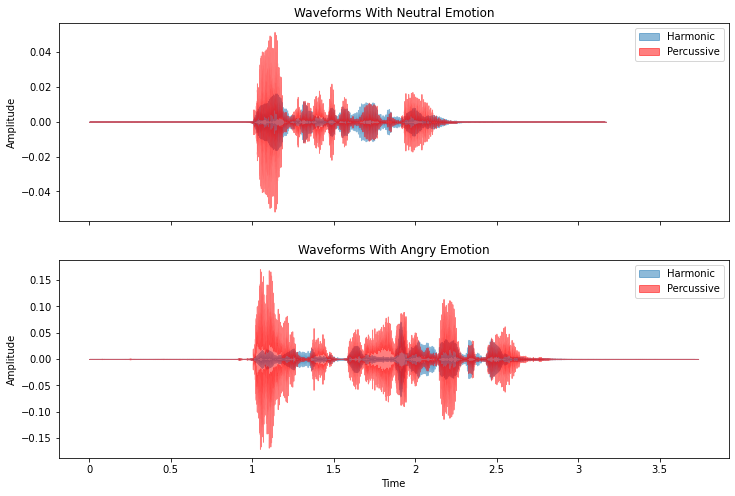

In [9]:
title2 = 'Data/All_Files/03-01-05-01-02-02-01.wav'

waveplot(File_Sample, title2, 'Waveforms With Neutral Emotion', 'Waveforms With Angry Emotion')

In [70]:
emotions = {'01': 'neutral', 
             '02': 'calm', 
             '03': 'happy',
             '04': 'sad',
             '05': 'angry',
             '06': 'fearful',
             '07': 'disgust',
             '08': 'suprised'}


emot_dict = {'1': 'neutral', 
             '2': 'calm', 
             '3': 'happy',
             '4': 'sad',
             '5': 'angry',
             '6': 'fearful',
             '7': 'disgust',
             '8': 'suprised'}


iten_dict = {'1': 'normal', 
             '2': 'strong', 
             }

text_dict= {'1': "Kids are talking by the door", 
             '2': "Dogs are sitting by the door", 
             }


In [71]:
dir_list = os.listdir('Data/All_Files/')

path = []
actor= []
emotion_id= []
intensity = []
text = []
gender = []

for i in dir_list:
    path.append(i)
    actor.append(i[-6:-4])
    emotion_id.append(i[7])
    intensity.append(i[10:-13])
    text.append(i[13:14])
    gender.append(i[1:2])
        
    df = pd.DataFrame(path, columns = ['path'])
    df['source'] = 'RAVIDESS'
    df = pd.concat([df, pd.DataFrame(actor, columns = ['actor'])], axis = 1)
    df = pd.concat([df, pd.DataFrame(emotion_id, columns = ['emotion_id'])], axis = 1)
    df = pd.concat([df, pd.DataFrame(intensity, columns = ['intensity'])], axis = 1)
    df = pd.concat([df, pd.DataFrame(text, columns = ['stated_text'])], axis = 1)
    df = pd.concat([df, pd.DataFrame(gender, columns = ['gender'])], axis = 1)


In [74]:
df['emotion'] = df['emotion_id'].map(emot_dict)
df['intensity'] = df['intensity'].map(iten_dict)
df['stated_text'] = df['stated_text'].map(text_dict)

df
df

,path,source,actor,emotion_id,intensity,stated_text,gender,emotion
0,03-01-06-01-02-02-02.wav,RAVIDESS,02,6,NaN,NaN,3,fearful
1,03-01-05-01-02-01-16.wav,RAVIDESS,16,5,NaN,NaN,3,angry
2,03-01-08-01-01-01-14.wav,RAVIDESS,14,8,NaN,NaN,3,suprised
3,03-01-06-01-02-02-16.wav,RAVIDESS,16,6,NaN,NaN,3,fearful
4,03-01-05-01-02-01-02.wav,RAVIDESS,02,5,NaN,NaN,3,angry
...,...,...,...,...,...,...,...,...
1436,03-01-08-02-02-01-19.wav,RAVIDESS,19,8,NaN,NaN,3,suprised
1437,03-01-02-02-01-01-23.wav,RAVIDESS,23,2,NaN,NaN,3,calm
1438,03-01-02-01-02-01-23.wav,RAVIDESS,23,2,NaN,NaN,3,calm
1439,03-01-08-01-01-01-19.wav,RAVIDESS,19,8,NaN,NaN,3,suprised


In [13]:
df['emotion'].value_counts()

sad         192
disgust     192
fearful     192
angry       192
suprised    192
happy       192
calm        192
neutral      96
Name: emotion, dtype: int64

In [14]:
# CREATE LOG MEL SPECTROGRAM
#spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
#spectrogram = librosa.power_to_db(spectrogram)

#librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
#plt.title('Mel Spectrogram - Male Calm')
#plt.savefig('MelSpec_MaleCalm.png')
#plt.colorbar(format='%+2.0f dB');

## Null Model

Given we have 8 emotions we are choosing from, the probability of correctly guessing one, without replacement, is about 13%. 
This will be our null score we will look to baseline model improvements off of.

## Audio Extraction

As we are looking to build a model for audio classification, we look extract several audio features. Our baseline will only use MFCC, While we will use MEL and Chroma later on to improve on our model's accuracy.

- **MFCC (Mel-Frequency Cepstral Coefficients):** 
    - MFCC, features represent phonemes (distinct units of sound) coming off of the vocal tract
- **MEL** 
    - THE MEL scale is a scale that relates the perceived frequency of a tone to the actual measured frequency. If we were to look at, say, a land-line dial up, the mel scale would measure the distance between these sounds. The word mel comes from "melody".
    
- **Chroma**
    - The chroma
    is a powerful measurement of pitch, differentiating between 12 classes of pitch
    
This

Calculate MFCC's for a given audio sample
@Slice the signal into short frames
compute periodogram estimate of power spectrum
Apply filterbank

In [23]:
X, y = [], []
for file in glob.glob("Data/All_Files//*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]] + '_' + gender(file_name.split("-")[-1])
        feature=extract_feature(file)
        X.append(feature)
        y.append(emotion)

  0%|          | 0/1440 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=.20, random_state=9)

#X_train, X_test, y_train, y_test = load_data()

array([[-6.24230286e+02,  6.13983917e+01, -4.12491560e+00, ...,
         1.61696313e-04,  5.35902072e-05,  2.95203790e-06],
       [-6.24230286e+02,  6.13983917e+01, -4.12491560e+00, ...,
         1.61696313e-04,  5.35902072e-05,  2.95203790e-06],
       [-6.24230286e+02,  6.13983917e+01, -4.12491560e+00, ...,
         1.61696313e-04,  5.35902072e-05,  2.95203790e-06],
       ...,
       [-6.24230286e+02,  6.13983917e+01, -4.12491560e+00, ...,
         1.61696313e-04,  5.35902072e-05,  2.95203790e-06],
       [-6.24230286e+02,  6.13983917e+01, -4.12491560e+00, ...,
         1.61696313e-04,  5.35902072e-05,  2.95203790e-06],
       [-6.24230286e+02,  6.13983917e+01, -4.12491560e+00, ...,
         1.61696313e-04,  5.35902072e-05,  2.95203790e-06]])